In [1]:
from termcolor import colored # type: ignore                                          # Colored text
from random import Random  # type: ignore                                             # Random number generator
import math  # type: ignore                                                           # Mathematical functions
import pandas as pd  # type: ignore                                                   # Data manipulation
import numpy as np  # type: ignore                                                    # Scientific computing
import matplotlib.pyplot as plt  # type: ignore                                       # Data visualization
from scipy.stats import binom as binomial  # type: ignore                             # Binomial distribution
from scipy.stats import norm as normal  # type: ignore                                # Normal distribution
from scipy.stats import poisson as poisson  # type: ignore                            # Poisson distribution
from scipy.stats import t as student  # type: ignore                                  # Student distribution
from scipy.stats import chi2  # type: ignore                                          # Chi-squared distribution
from scipy.stats import ttest_1samp  # type: ignore                                   # One-sample t-test
from scipy.stats import chisquare  # type: ignore                                     # Chi-squared test
from scipy.special import comb  # type: ignore                                        # Combinations
from mlxtend.frequent_patterns import apriori  # type: ignore                         # Apriori algorithm
from mlxtend.frequent_patterns import fpgrowth  # type: ignore                        # FP-growth algorithm
from mlxtend.frequent_patterns import association_rules  # type: ignore               # Association rules
from mlxtend.preprocessing import TransactionEncoder  # type: ignore                  # Transaction encoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # type: ignore  # Discriminant Analysis
from tensorflow import keras  # type: ignore                                          # Deep Learning library
from tensorflow.keras import Model  # type: ignore                                    # Model class
from tensorflow.keras.layers import Input, Dense, BatchNormalization  # type: ignore  # Layers
from tensorflow.keras.utils import to_categorical  # type: ignore                     # One-hot encoding
from tensorflow.keras.optimizers import Adam  # type: ignore                          # Optimizer
from livelossplot import PlotLossesKeras  # type: ignore                              # Live plot
from keras.src.optimizers import RMSprop  # type: ignore                              # Optimizer
from sklearn.model_selection import train_test_split  # type: ignore                  # Train-test split
from sklearn.metrics import roc_auc_score # type: ignore                              # ROC AUC score
from simanneal import Annealer  # type: ignore                                        # Simulated Annealing
from inspyred import ec  # type: ignore                                               # Evolutionary Computation
import warnings  # type: ignore                                                       # Disable warnings
from res.Functions import *  # type: ignore                                     # Custom functions
warnings.filterwarnings("ignore")                                                     # Disable warnings
outputColor = "blue"                                                                  # Color for the output|

C:\Users\Luka\AppData\Local\Temp\ipykernel_30028\565254830.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd  # type: ignore                                                   # Data manipulation


# Oefening 1
## Simulated

In [7]:
class TheBackpackProblem(Annealer):
    def __init__(self, state, items_weight, items_value):
        self.items_weight = items_weight
        self.items_value = items_value
        super(TheBackpackProblem, self).__init__(state)
    
    def energy(self):
        solution = self.state
        total_weight = (solution * self.items_weight).sum()
        if total_weight > 750:
            total_value = 0
        else:
            total_value = (solution * self.items_value).sum()
        return -total_value
    
    def move(self):
        idx = np.random.randint(0, len(self.state))
        self.state[idx] = 1 - self.state[idx]

# Read knapsack items from CSV
knapsackItems = pd.read_csv('datasets/Knapsack Items.csv')
items_weight = knapsackItems['gewichten(gr)']
items_value = knapsackItems['waarde']

initial_state = np.random.choice([0, 1], size=len(items_weight))
optimal_solution, optimal_value = TheBackpackProblem(initial_state, items_weight, items_value).anneal()

print(colored(f"Optimal solution: {optimal_solution}\nObjective function value: {optimal_value}", "blue"))


 Temperature        Energy    Accept   Improve     Elapsed   Remaining


Optimal solution: [1 0 1 0 1 0 1 1 1 0 0 0 0 1 1]
Objective function value: -1458


## Genetic

Optimal solution: [1 1 0 0 1 0 1 0 1 1 1 0 0 0 1]
Objective function value: 1446


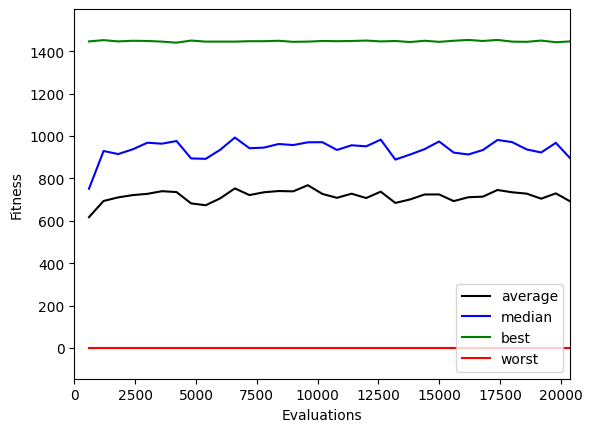

In [8]:
def generate(random=None, args=None):
    return np.random.choice([0, 1], size=len(args.get('weight_items')))

# Function to evaluate the fitness of each candidate solution
def evaluate(candidates, args=None):
    fitness = []
    for candidate in candidates:
        total_weight = (candidate * args.get('weight_items')).sum()
        if total_weight > 750:
            total_value = 0
        else:
            total_value = (candidate * args.get('value_items')).sum()
        fitness.append(total_value)
    return fitness

# Read knapsack items from CSV
knapsackItems = pd.read_csv('datasets/Knapsack Items.csv')  # Ensure the correct file path
items_weight = knapsackItems['gewichten(gr)'].to_numpy()
items_value = knapsackItems['waarde'].to_numpy()

# Setup and run the Genetic Algorithm
rand = Random()
ga = ec.GA(rand)
ga.terminator = ec.terminators.evaluation_termination
ga.variator = [ec.variators.n_point_crossover, ec.variators.bit_flip_mutation]
ga.observer = ec.observers.plot_observer

population = ga.evolve(
    generator=generate,
    evaluator=evaluate,
    pop_size=600,
    maximize=True,
    bounder=ec.Bounder(0, 1),
    max_evaluations=20000,
    mutation_rate=0.25,
    weight_items=items_weight,
    value_items=items_value
)

population.sort(reverse=True)

print(colored(f"Optimal solution: {population[0].candidate}\nObjective function value: {population[0].fitness}", outputColor))

# Oefening 2
## Simulated

In [12]:
class GutterProblem(Annealer):
    def __init__(self, state):
        super(GutterProblem, self).__init__(state)
    
    def move(self):
        idx = np.random.randint(len(self.state))
        self.state[idx] = np.random.uniform(0, 1)
    
    def energy(self):
        H, B = self.state
        if H + B + H > 1:
            return float('inf')
        return -1 * (H * B)

# Initial state
initial_state = [np.random.uniform(0, 1), np.random.uniform(0, (1 - np.random.uniform(0, 1)) / 2)]

# Simulated Annealing
gutter = GutterProblem(initial_state)
gutter.steps = 10000  # Number of steps
gutter.Tmax = 25000.0  # Max temperature
gutter.Tmin = 2.5  # Min temperature

state, energy = gutter.anneal()
optimal_value = -energy

print(f"Optimal solution: H={state[0]}, B={state[1]}\nObjective function value: {optimal_value}")


 Temperature        Energy    Accept   Improve     Elapsed   Remaining


Optimal solution: H=0.26261128160014513, B=0.4742513983697275
Objective function value: 0.12454376752653512


## Genetic

Optimal solution: H=0.24274274163864587, B=0.49188431316315245
Objective function value: 0.11940134674626589


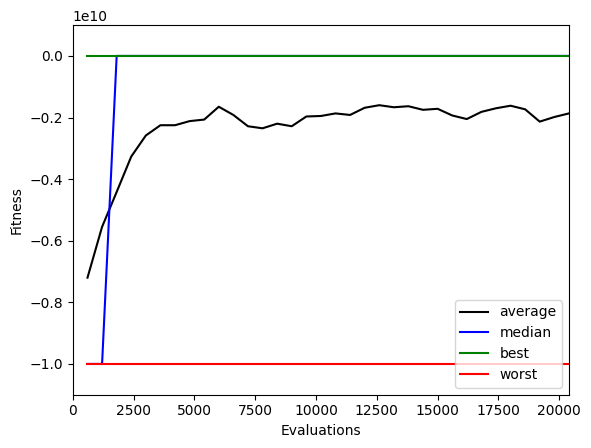

In [13]:
# Function to generate initial population of candidate solutions
def generate_gutter(random, args):
    B = random.uniform(0, 1)
    H = random.uniform(0, (1 - B) / 2)
    return [B, H]

# Function to evaluate the fitness of each candidate solution
def evaluate_gutter(candidates, args):
    fitness = []
    for candidate in candidates:
        H, B = candidate
        if H + B + H > 1:
            fitness.append(float('-1e10'))  # Assign a very low value instead of -inf
        else:
            fitness.append(H * B)
    return fitness

# Random Generator
rand = Random()

# Genetic Algorithm Setup
ga = ec.GA(rand)
ga.terminator = ec.terminators.evaluation_termination
ga.variator = [ec.variators.n_point_crossover, ec.variators.gaussian_mutation]
ga.observer = ec.observers.plot_observer

# Evolve Population
population = ga.evolve(
    generator=generate_gutter,
    evaluator=evaluate_gutter,
    pop_size=600,
    maximize=True,
    bounder=ec.Bounder(0, 1),
    max_evaluations=20000,
    mutation_rate=0.25
)

# Sort population based on fitness in descending order
population.sort(reverse=True)

# Print optimal solution and its fitness value
optimal_solution = population[0].candidate
optimal_value = population[0].fitness

print(f"Optimal solution: H={optimal_solution[0]}, B={optimal_solution[1]}\nObjective function value: {optimal_value}")

# Oefening 3
## Simulated

In [27]:
class StadiumProblem(Annealer):
    def __init__(self, state):
        super(StadiumProblem, self).__init__(state)
    
    def move(self):
        # Randomly change the length or breadth while keeping the constraint L + B = 200
        idx = np.random.randint(len(self.state))
        if idx == 0:
            delta = np.random.uniform(-5, 5)  # Smaller mutation step for finer adjustments
            self.state[0] = max(0, min(self.state[0] + delta, 200))
            self.state[1] = 200 - self.state[0]
        else:
            delta = np.random.uniform(-5, 5)  # Smaller mutation step for finer adjustments
            self.state[1] = max(0, min(self.state[1] + delta, 200))
            self.state[0] = 200 - self.state[1]
    
    def energy(self):
        L, B = self.state
        return -1 * (L * B)  # Maximize area by minimizing the negative of the area

# Initial state
initial_state = [100, 100]  # Start closer to the expected optimal values

# Simulated Annealing
stadium = StadiumProblem(initial_state)
stadium.steps = 10000  # Number of steps
stadium.Tmax = 25000.0  # Max temperature
stadium.Tmin = 2.5  # Min temperature

state, energy = stadium.anneal()
optimal_value = -energy

print(f"Optimal solution: L={state[0]}, B={state[1]}\nObjective function value: {optimal_value}")

 Temperature        Energy    Accept   Improve     Elapsed   Remaining


Optimal solution: L=100, B=100
Objective function value: 10000


## Genetic

Optimal solution: L=99.99369656154362, B=100.00630343845638
Objective function value: 9999.999960266663


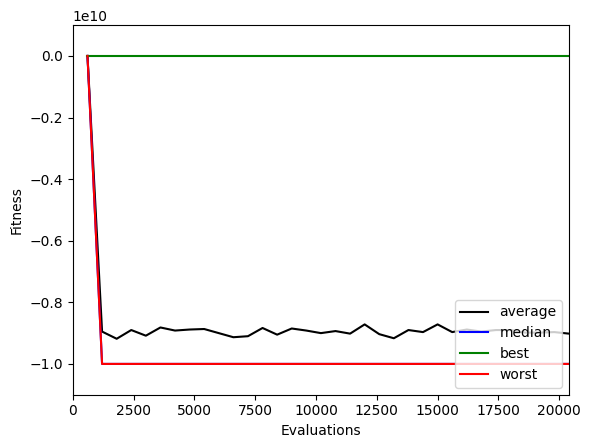

In [26]:
def generate_stadium(random, args):
    # Generate a random length L, ensuring that B = 200 - L
    L = random.uniform(60, 140)  # Starting closer to expected optimal values
    B = 200 - L
    return [L, B]

def evaluate_stadium(candidates, args):
    fitness = []
    for candidate in candidates:
        L, B = candidate
        if abs(L + B - 200) < 1e-6:  # Ensure the constraint is strictly met
            fitness.append(L * B)  # Objective function to maximize area
        else:
            fitness.append(float('-1e10'))  # Penalize invalid solutions
    return fitness

def custom_mutator(random, candidates, args):
    for candidate in candidates:
        if random.random() < args.get('mutation_rate', 0.1):
            idx = random.randint(0, 1)
            candidate[idx] += random.gauss(0, 5)  # Apply Gaussian mutation with smaller std deviation
            candidate[idx] = max(0, min(candidate[idx], 200))  # Ensure within bounds
            candidate[1 - idx] = 200 - candidate[idx]  # Adjust the other variable to meet the constraint
    return candidates

# Random number generator
rand = Random()

# Genetic Algorithm setup
ga = ec.GA(rand)
ga.terminator = ec.terminators.evaluation_termination
ga.variator = [ec.variators.n_point_crossover, custom_mutator]
ga.observer = ec.observers.plot_observer

# Evolve population
population = ga.evolve(
    generator=generate_stadium,
    evaluator=evaluate_stadium,
    pop_size=600,
    maximize=True,
    bounder=ec.Bounder([0, 0], [200, 200]),
    max_evaluations=20000,
    mutation_rate=0.1  # Lower mutation rate for more controlled changes
)

# Sort population based on fitness in descending order
population.sort(reverse=True)

# Print optimal solution and its fitness value
optimal_solution = population[0].candidate
optimal_value = population[0].fitness

print(f"Optimal solution: L={optimal_solution[0]}, B={optimal_solution[1]}\nObjective function value: {optimal_value}")

# Oefening 4
## Simulated

In [30]:
class OptimizationProblem(Annealer):
    def __init__(self, state):
        super(OptimizationProblem, self).__init__(state)
    
    def move(self):
        # Randomly change x1 or x2 within the bounds
        idx = np.random.randint(len(self.state))
        self.state[idx] += np.random.uniform(-0.1, 0.1)
        self.state[idx] = max(-1.0, min(self.state[idx], 1.0))
    
    def energy(self):
        x1, x2 = self.state
        return -1 * (np.sin(x1 + x2) + (x1 - x2)**2 - 1.5*x1 + 2.5*x2 + 1)

# Initial state
initial_state = [np.random.uniform(-1, 1), np.random.uniform(-1, 1)]

# Simulated Annealing
optimization = OptimizationProblem(initial_state)
optimization.steps = 10000  # Number of steps
optimization.Tmax = 2500.0  # Max temperature
optimization.Tmin = 2.5  # Min temperature

state, energy = optimization.anneal()
optimal_value = -energy

print(f"Optimal solution: x1={state[0]}, x2={state[1]}\nObjective function value: {optimal_value}")

 Temperature        Energy    Accept   Improve     Elapsed   Remaining


Optimal solution: x1=-1.0, x2=1.0
Objective function value: 9.0


## Genetic

Optimal solution: x1=-1, x2=1
Objective function value: 9.0


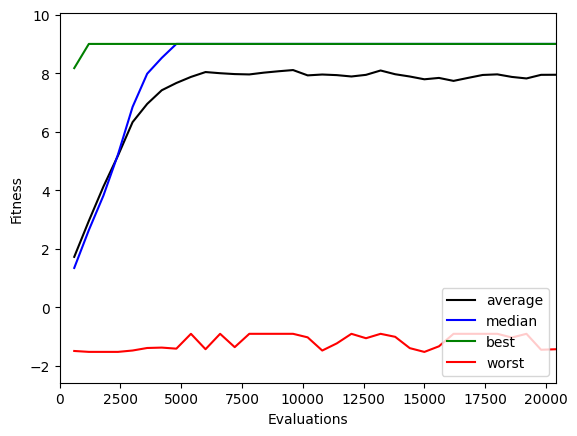

In [31]:
def generate_optimization(random, args):
    return [random.uniform(-1, 1), random.uniform(-1, 1)]

def evaluate_optimization(candidates, args):
    fitness = []
    for candidate in candidates:
        x1, x2 = candidate
        value = np.sin(x1 + x2) + (x1 - x2)**2 - 1.5*x1 + 2.5*x2 + 1
        fitness.append(value)
    return fitness

# Random Generator
rand = Random()

# Genetic Algorithm Setup
ga = ec.GA(rand)
ga.terminator = ec.terminators.evaluation_termination
ga.variator = [ec.variators.n_point_crossover, ec.variators.gaussian_mutation]
ga.observer = ec.observers.plot_observer

# Evolve Population
population = ga.evolve(
    generator=generate_optimization,
    evaluator=evaluate_optimization,
    pop_size=600,
    maximize=True,
    bounder=ec.Bounder([-1, -1], [1, 1]),
    max_evaluations=20000,
    mutation_rate=0.25
)

# Sort population based on fitness in descending order
population.sort(reverse=True)

# Print optimal solution and its fitness value
optimal_solution = population[0].candidate
optimal_value = population[0].fitness

print(f"Optimal solution: x1={optimal_solution[0]}, x2={optimal_solution[1]}\nObjective function value: {optimal_value}")